In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
import scipy.ndimage
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import dicom
%matplotlib inline

In [2]:
dcm_dir = './test'
dcm_list = []
for f in os.listdir(dcm_dir):
    if '.dcm' in f.lower():
        dcm_list.append(os.path.join(dcm_dir,f))
print len(dcm_list)

176


In [9]:
test_dcm = dicom.read_file(dcm_list[0])
print test_dcm

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'ND', 'NORM']
(0008, 0012) Instance Creation Date              DA: '20111110'
(0008, 0013) Instance Creation Time              TM: '094123.687000'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.2.30.25591.2011111009411952165628161
(0008, 0020) Study Date                          DA: '20111110'
(0008, 0021) Series Date                         DA: '20111110'
(0008, 0022) Acquisition Date                    DA: '20111110'
(0008, 0023) Content Date                        DA: '20111110'
(0008, 0030) Study Time                          TM: '093416.265000'
(0008, 0031) Series Time                         TM: '094123.531000'
(0008, 0032) Acquisition Time                    TM: '093522.335000'
(0008, 0033) Content Time                        TM: '094123.68700

In [10]:
ConstPixelDims = (test_dcm.Rows,test_dcm.Columns,len(dcm_list))
print ConstPixelDims # 3D NumPy dims

(256, 256, 176)


In [11]:
ConstPixelSpacing = (float(test_dcm.PixelSpacing[0]),float(test_dcm.PixelSpacing[1]),float(test_dcm.SliceThickness))
print ConstPixelSpacing # spacing value in mm

(0.9765625, 0.9765625, 1.0)


In [12]:
# numpy.arange(start,stop,step)
x = np.arange(0.0,(ConstPixelDims[0]+1)*ConstPixelSpacing[0],ConstPixelSpacing[0])
y = np.arange(0.0,(ConstPixelDims[1]+1)*ConstPixelSpacing[1],ConstPixelSpacing[1])
z = np.arange(0.0,(ConstPixelDims[2]+1)*ConstPixelSpacing[2],ConstPixelSpacing[2])

In [7]:
ArrayDicom = np.zeros(ConstPixelDims,dtype=test_dcm.pixel_array.dtype)
for dcm_file in dcm_list:
    dcm = dicom.read_file(dcm_file)
    # store the raw image data
    ArrayDicom[:,:,dcm_list.index(dcm_file)]=dcm.pixel_array

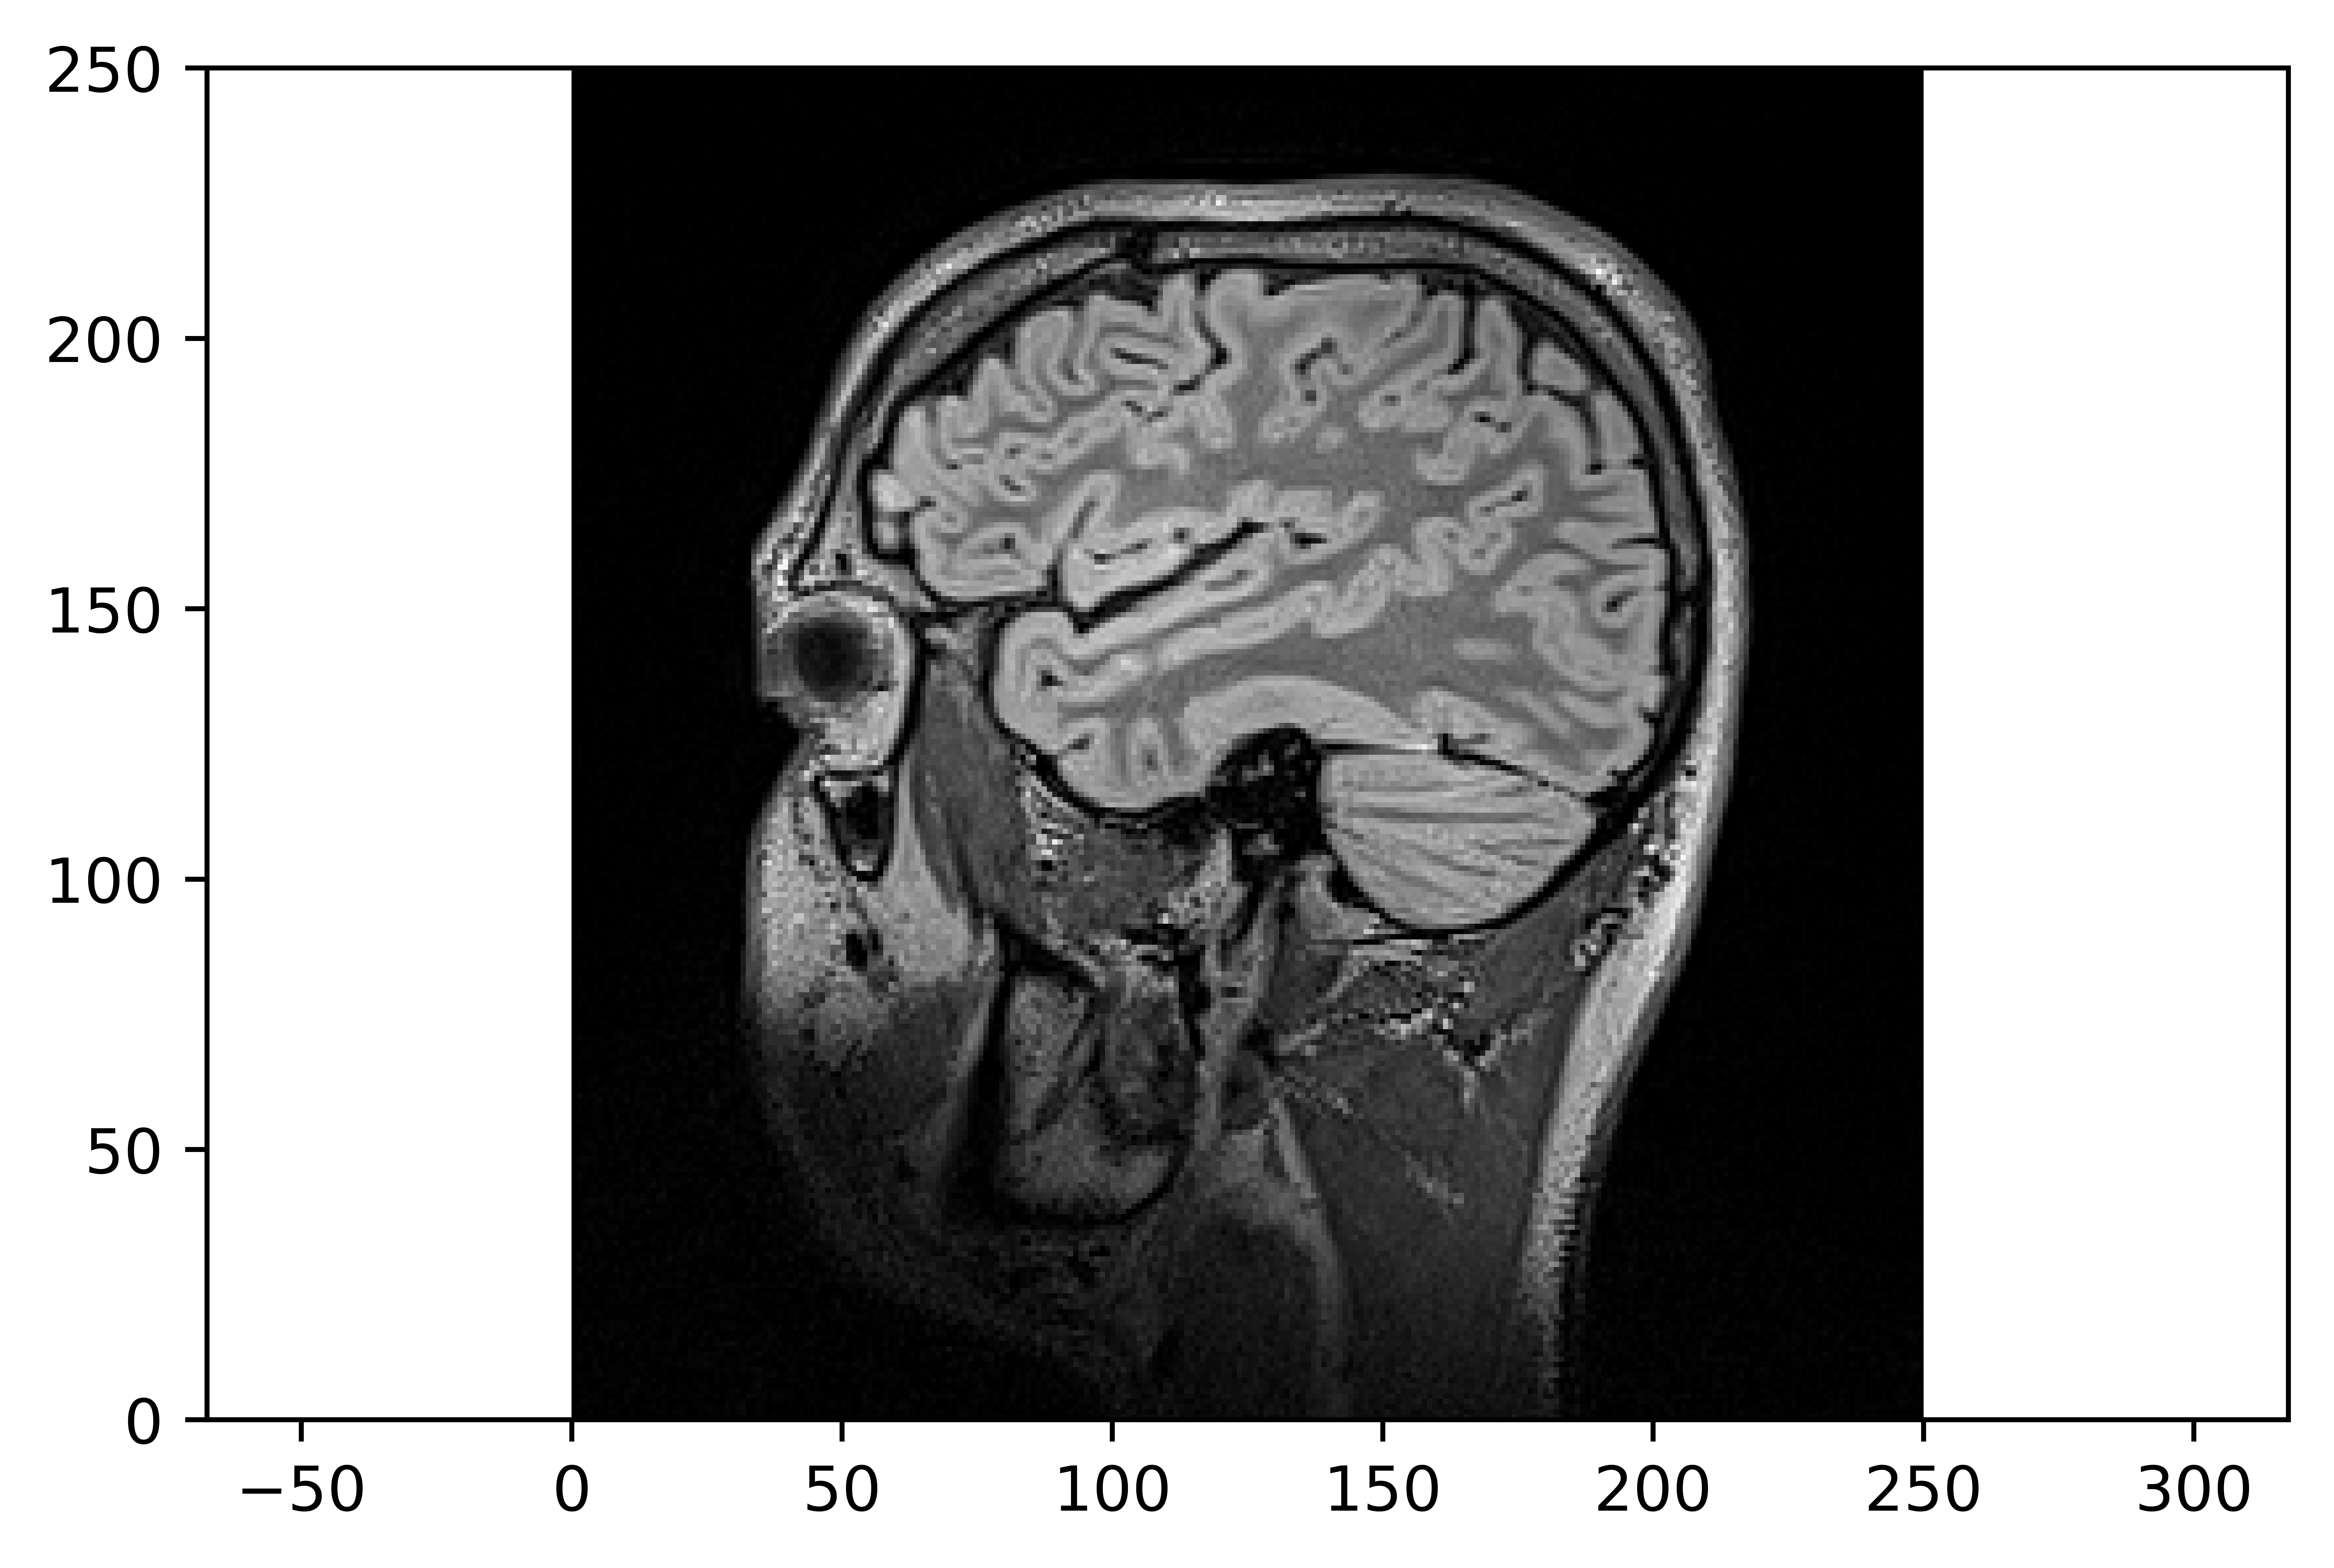

In [14]:
plt.figure(dpi=1600)
# set coordinates axis

plt.axes().set_aspect('equal',adjustable='datalim') 
# 'equal' means same scaling from data to plot units for x and y
# adjustable='datalim' means change xlim or ylim

plt.gray()
# set image gray to accelerate

plt.pcolormesh(x,y,np.flipud(ArrayDicom[:,:,10])) # No.10 dcm file
# plt.pcolormesh: Create a pseudocolor plot of a 2-D array, preferred for large arrays.
# numpy.flipud: Flip array in the up/down direction.